# Initial Data Analysis

In [2]:
import pandas as pd
import os

from explore_data.ust_visualizer import UstVisualizer

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7, 3)

import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = '~/Downloads'

## Überprüfung der Annahmen

In [4]:
vergleiche = pd.read_excel(f'{PATH}/3_Vergleiche.xlsx')
vergleiche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Base    50 non-null     float64
 1   KB      50 non-null     float64
 2   KL      50 non-null     float64
 3   P       50 non-null     float64
 4   FL      50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


* `float` <=> Daten sind intervallskaliert

#### Fehlende Daten?

In [7]:
vergleiche.isna().mean() #Überprüfung einzelner Spalten im Datensatz

Base    0.0
KB      0.0
KL      0.0
P       0.0
FL      0.0
dtype: float64

#### Dopplungen?

In [8]:
vergleiche.duplicated().mean()

0.0

## Plots

In [9]:
visualizer = UstVisualizer(vergleiche)

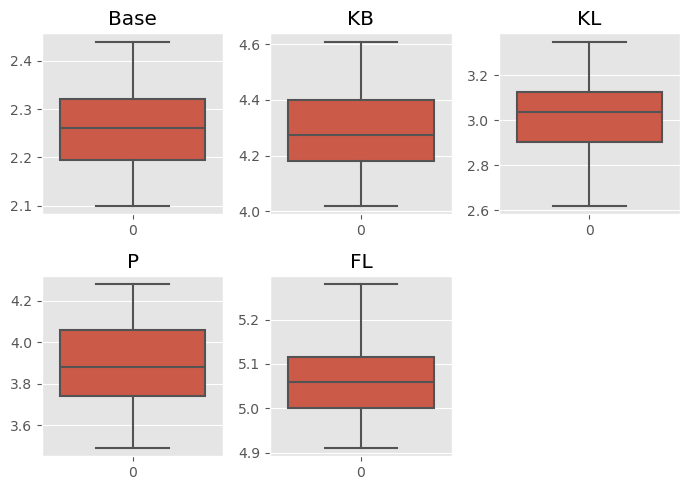

In [11]:
visualizer.boxplot(columns=vergleiche.columns, y_max=None)

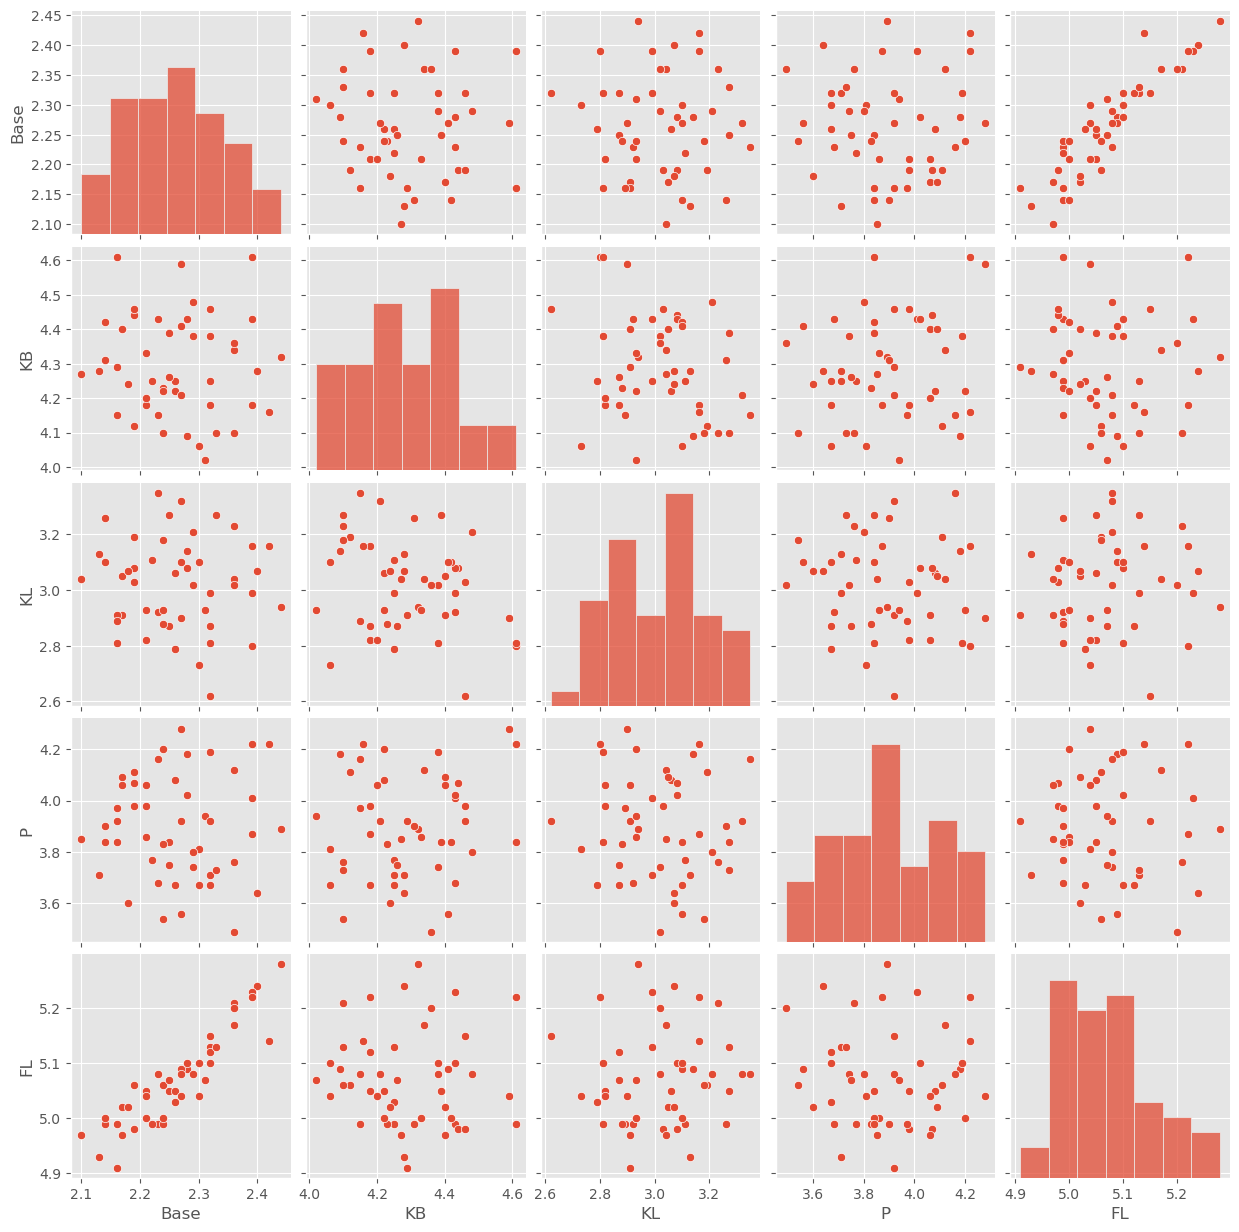

In [12]:
visualizer.pairplot();

* Schlussfolgerungen
    - Mindestens intervallskalierte abhängige Variable: Bedigung erfüllt
* Merkmalsausprägungen müssen unabhängig voneinander sein: keine Abhängigkeit, da kein Wert in den jew. Spalten (Stichproben) auch in einer anderen Stichprobe zu finden ist
* Normalverteilung der abhängigen Variable in allen Gruppen: allein `B` und `FL` scheinen eindeutig normaverteilt zu sein => `QQPlot` checken
* Gleiche Varianz in allen Gruppen: aus `Boxplots` zeichnet sich eine relativ vergleichbare Varianz an => testen